## Starter Template For Retrieving ACS Census Survey Data

#### Note: install census if you haven't already

In [2]:
#Importing the Relevant Modules
import pandas as pd
from census import Census
import numpy as np
from IPython.display import display
import seaborn as sns
import geopandas as gp

**Ignore if no import errors arise**
-----
Please note that installing geopandas may require additional steps.

In my case I had to install the distributions of Fiona and GDAL (both neede for the above packages) through this link: https://www.lfd.uci.edu/~gohlke/pythonlibs/ (specifically for Windows). See the first answer in this stackoverflow question for more on this: https://stackoverflow.com/questions/50876702/cant-install-fiona-on-windows

Lastly, if you get this error when importing geopandas: "OSError: Could not find lib geos_c.dll or load any of its variants," one way I solved this was by downloading the file instead. Once downloaded, I placed the file into the location where the file was stated to be missing from (ie. "C:\Users\Daniel\Anaconda3\Library\bin\geos_c.dll") < - went into the bin folder indicated in the path and dropped the file there.

- https://www.dll-files.com/geos_c.dll.html

-------------------------------------

### General Overview
In order to retrieve census data for the ACS, my general steps were:
1. Identify the variables of interest by referring to this page: https://www.census.gov/programs-surveys/acs/guidance/which-data-tool/table-ids-explained.html
    - In particular, I looked at element 1, 2, and 3 tables
    - **Element 1** For this project, I chose to focus on the B table type of which contains the "Most detailed estimates on all topics for all geographies"
    - **Element 2** I chose to focus on subject numbers 02 (Race),03 (Hispanic or Latino Origin),15 (Educational Attainment),19 (Income). **Please feel free** to add more 
    - **Element 3** I went with 001 as I wanted to look at general values. Any other 2 or 3 digit number IDs contained a more granular look at the subject of interest. As an example for the race subject number the 009 gave data on `Universe:  Black or African American alone or in combination with one or more other races` As such, 001 was chosen.
 2. Once I had the variables of interest down, then I went ahead and retrieved the data of interest via an API call using the census python package (see here for more info: https://pypi.org/project/census/).
 3. I then  reshaped the data to be in a long format for ease of use when analyzing the data.
 4. Lastly, I added a type (ie. Race) and subtype (ie. White) columns for readability

### Loading in table shells : "They contain the line number, description of the data, and table ID" - Census

This is how we'll be able to track down the variables of interest

In [2]:
shell = pd.read_excel("https://www2.census.gov/programs-surveys/acs/summary_file/2019/documentation/user_tools/ACS2019_Table_Shells.xlsx")

## Table ID B02001: RACE

In [3]:
shell[shell['Table ID'] == 'B02001']

,Table ID,Line,UniqueID,Stub,Data Release
541,B02001,NaN,NaN,RACE,"1,5"
542,B02001,NaN,NaN,Universe: Total population,NaN
543,B02001,1,B02001_001,Total:,NaN
544,B02001,2,B02001_002,White alone,NaN
545,B02001,3,B02001_003,Black or African American alone,NaN
546,B02001,4,B02001_004,American Indian and Alaska Native alone,NaN
547,B02001,5,B02001_005,Asian alone,NaN
548,B02001,6,B02001_006,Native Hawaiian and Other Pacific Islander alone,NaN
549,B02001,7,B02001_007,Some other race alone,NaN
550,B02001,8,B02001_008,Two or more races:,NaN


## Table ID B15003: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER

In [4]:
shell[shell['Table ID'] == 'B15003']  

,Table ID,Line,UniqueID,Stub,Data Release
12247,B15003,NaN,NaN,EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 Y...,"1,5"
12248,B15003,NaN,NaN,Universe: Population 25 years and over,NaN
12249,B15003,1,B15003_001,Total:,NaN
12250,B15003,2,B15003_002,No schooling completed,NaN
12251,B15003,3,B15003_003,Nursery school,NaN
12252,B15003,4,B15003_004,Kindergarten,NaN
12253,B15003,5,B15003_005,1st grade,NaN
12254,B15003,6,B15003_006,2nd grade,NaN
12255,B15003,7,B15003_007,3rd grade,NaN
12256,B15003,8,B15003_008,4th grade,NaN


## Table ID B19101: FAMILY INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)

In [5]:
shell[shell['Table ID']=='B19101']  

,Table ID,Line,UniqueID,Stub,Data Release
18283,B19101,,NaN,FAMILY INCOME IN THE PAST 12 MONTHS (IN 2019 I...,"1,5"
18284,B19101,,NaN,Universe: Families,NaN
18285,B19101,1,B19101_001,Total:,NaN
18286,B19101,2,B19101_002,"Less than $10,000",NaN
18287,B19101,3,B19101_003,"$10,000 to $14,999",NaN
18288,B19101,4,B19101_004,"$15,000 to $19,999",NaN
18289,B19101,5,B19101_005,"$20,000 to $24,999",NaN
18290,B19101,6,B19101_006,"$25,000 to $29,999",NaN
18291,B19101,7,B19101_007,"$30,000 to $34,999",NaN
18292,B19101,8,B19101_008,"$35,000 to $39,999",NaN


## Table ID B03002: HISPANIC OR LATINO ORIGIN BY RACE

In [6]:
shell[shell['Table ID']=='B03002'] 

,Table ID,Line,UniqueID,Stub,Data Release
957,B03002,,NaN,HISPANIC OR LATINO ORIGIN BY RACE,"1,5"
958,B03002,,NaN,Universe: Total population,NaN
959,B03002,1,B03002_001,Total:,NaN
960,B03002,2,B03002_002,Not Hispanic or Latino:,NaN
961,B03002,3,B03002_003,White alone,NaN
962,B03002,4,B03002_004,Black or African American alone,NaN
963,B03002,5,B03002_005,American Indian and Alaska Native alone,NaN
964,B03002,6,B03002_006,Asian alone,NaN
965,B03002,7,B03002_007,Native Hawaiian and Other Pacific Islander alone,NaN
966,B03002,8,B03002_008,Some other race alone,NaN


In [7]:
#Include invariants, i.e, variables of interest, acs, etc.
acs_year = 2019
#set up API key
key = # sign up for a key here: https://api.census.gov/data/key_signup.html

## Defining our fields of interest using the Unique ID as our reference points. Please note that an extra character, "E", is added here as it pertains to the Estimate values 

In [24]:
#create list of desired vars 
race_vars = ["B02001_002E", "B02001_003E", "B02001_004E", "B02001_005E", "B02001_006E", 
             "B02001_007E", "B02001_008E"]
education_vars = ["B15003_002E", "B15003_003E", "B15003_004E", "B15003_005E", "B15003_006E",
                  "B15003_007E", "B15003_008E", "B15003_009E", "B15003_010E", "B15003_011E",
                  "B15003_012E", "B15003_013E", "B15003_014E","B15003_015E", "B15003_016E",
                  "B15003_017E", "B15003_018E", "B15003_019E", "B15003_020E", "B15003_021E",
                "B15003_022E", "B15003_023E", "B15003_024E", "B15003_025E"]
family_hh_income = ["B19101_002E", "B19101_003E", "B19101_004E", "B19101_005E", "B19101_006E", "B19101_007E", 
                    "B19101_008E", "B19101_009E", "B19101_010E", "B19101_011E", "B19101_012E", "B19101_013E",
                    "B19101_014E", "B19101_015E", "B19101_016E", "B19101_017E"]
latino_population = ["B03002_002E", "B03002_012E"]

#merging variables into columns and then converting into a tuple
census_var_list = race_vars + education_vars + family_hh_income + latino_population

### Calling API at the census tract level. We were able to retrieve the corresponding state and city FIPS codes via this link: https://www2.census.gov/programs-surveys/decennial/2010/partners/pdf/FIPS_StateCounty_Code.pdf

In [25]:
#downloading the census data
c = Census(key=key, year = acs_year)
census_data_census_tract = c.acs5.get(fields = census_var_list, 
                                      geo = {'for': 'tract:*' , 
                                             'in': 'state:{} county:{}'.format('37', '063')}
                                     )
census_tracts = pd.DataFrame(census_data_census_tract)
census_tracts.head(2)

,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B15003_002E,B15003_003E,B15003_004E,...,B19101_013E,B19101_014E,B19101_015E,B19101_016E,B19101_017E,B03002_002E,B03002_012E,state,county,tract
0,3754.0,991.0,17.0,122.0,0.0,201.0,419.0,22.0,0.0,0.0,...,62.0,118.0,34.0,105.0,254.0,4466.0,1038.0,37,063,000600
1,635.0,2330.0,0.0,0.0,0.0,77.0,369.0,23.0,0.0,0.0,...,4.0,27.0,42.0,0.0,5.0,2771.0,640.0,37,063,001304


## Reshaping dataframe from wide format (many columns) to a long format

In [26]:
census_tracts = census_tracts.melt( id_vars=['state', 'county', 'tract'],
       value_vars=census_var_list)
census_tracts.head(2)

,state,county,tract,variable,value
0,37,063,000600,B02001_002E,3754.0
1,37,063,001304,B02001_002E,635.0


## Adding Type (ie. Race) and SubType (ie. White) columns for readability

In [27]:
demoType = {'B02001':"Race", 'B15003':"Education",
            'B19101':"Family Household Income",
            'B03002':"Hispanic/Latino"}
# indexing up to 6 character -> the length of the table ID
census_tracts['Type'] = census_tracts['variable'].apply(lambda x: demoType[x[:6]])
census_tracts.head(3)

,state,county,tract,variable,value,Type
0,37,063,000600,B02001_002E,3754.0,Race
1,37,063,001304,B02001_002E,635.0,Race
2,37,063,001710,B02001_002E,1874.0,Race


Retrieving columns with the variables of interest in order to use their more  readable variable names 

In [28]:
filterE = lambda x: x.replace("E","")
variables =list(map(filterE,census_var_list))

# dictionary {census unique ID  : readable variable name}
demoSubtype = shell.query("UniqueID in @variables").set_index('UniqueID')['Stub'].to_dict()
demoSubtype.values()

dict_values(['White alone', 'Black or African American alone', 'American Indian and Alaska Native alone', 'Asian alone', 'Native Hawaiian and Other Pacific Islander alone', 'Some other race alone', 'Two or more races:', 'Not Hispanic or Latino:', 'Hispanic or Latino:', 'No schooling completed', 'Nursery school', 'Kindergarten', '1st grade', '2nd grade', '3rd grade', '4th grade', '5th grade', '6th grade', '7th grade', '8th grade', '9th grade', '10th grade', '11th grade', '12th grade, no diploma', 'Regular high school diploma', 'GED or alternative credential', 'Some college, less than 1 year', 'Some college, 1 or more years, no degree', "Associate's degree", "Bachelor's degree", "Master's degree", 'Professional school degree', 'Doctorate degree', 'Less than $10,000', '$10,000 to $14,999', '$15,000 to $19,999', '$20,000 to $24,999', '$25,000 to $29,999', '$30,000 to $34,999', '$35,000 to $39,999', '$40,000 to $44,999', '$45,000 to $49,999', '$50,000 to $59,999', '$60,000 to $74,999', '$75

In [29]:
census_tracts['Subtype'] = census_tracts['variable'].apply(lambda x: demoSubtype[x[:-1]])

In [30]:
census_tracts

,state,county,tract,variable,value,Type,Subtype
0,37,063,000600,B02001_002E,3754.0,Race,White alone
1,37,063,001304,B02001_002E,635.0,Race,White alone
2,37,063,001710,B02001_002E,1874.0,Race,White alone
3,37,063,001711,B02001_002E,1742.0,Race,White alone
4,37,063,001801,B02001_002E,4134.0,Race,White alone
...,...,...,...,...,...,...,...
2935,37,063,001807,B03002_012E,2197.0,Hispanic/Latino,Hispanic or Latino:
2936,37,063,001808,B03002_012E,684.0,Hispanic/Latino,Hispanic or Latino:
2937,37,063,001809,B03002_012E,742.0,Hispanic/Latino,Hispanic or Latino:
2938,37,063,002019,B03002_012E,57.0,Hispanic/Latino,Hispanic or Latino:


## General EDA

In [31]:
def getType(df,x):
    return df[df['Type'] == x]

In [32]:
census_tracts['Type'].unique()

array(['Race', 'Education', 'Family Household Income', 'Hispanic/Latino'],
      dtype=object)

### Predominant Subtype Per Census Tract

In [93]:
def getMax(df,subtype):
    data = (getType(df,subtype)
     .pivot_table(index='tract',
                  values='value',
                  columns='Subtype',
                  aggfunc='sum')
           )
    
    print(f"\t----Predominant {subtype} Value Counts----")
    display(data
     .apply(lambda x: x.idxmax(),1)
     .value_counts()
    )
    print(f"\n\t----Predominant {subtype} Absolute Count ----")
    display(data
     .apply(lambda x: x.max(),1)
     .to_frame().T
    )

In [94]:
getMax(census_tracts, 'Race')
getMax(census_tracts, 'Education')
getMax(census_tracts, 'Family Household Income')
getMax(census_tracts, 'Hispanic/Latino')

	----Predominant Race Value Counts----


White alone                                36
Black or African American alone            23
American Indian and Alaska Native alone     1
dtype: int64


	----Predominant Race Absolute Count ----


tract,000101,000102,000200,000301,000302,000401,000402,000500,000600,000700,...,002023,002024,002025,002026,002027,002028,002100,002200,002300,980100
0,1718.0,2510.0,2417.0,1262.0,3072.0,2603.0,2018.0,2290.0,3754.0,2601.0,...,2040.0,4518.0,3237.0,4700.0,4556.0,4568.0,5999.0,1324.0,1103.0,0.0


	----Predominant Education Value Counts----


Bachelor's degree                           40
Regular high school diploma                 18
10th grade                                   1
Some college, 1 or more years, no degree     1
dtype: int64


	----Predominant Education Absolute Count ----


tract,000101,000102,000200,000301,000302,000401,000402,000500,000600,000700,...,002023,002024,002025,002026,002027,002028,002100,002200,002300,980100
0,487.0,719.0,660.0,397.0,717.0,631.0,729.0,527.0,868.0,684.0,...,834.0,1709.0,1688.0,1004.0,2206.0,2948.0,1557.0,486.0,239.0,0.0


	----Predominant Family Household Income Value Counts----


$75,000 to $99,999      17
$200,000 or more        13
Less than $10,000        7
$50,000 to $59,999       6
$100,000 to $124,999     4
$150,000 to $199,999     4
$60,000 to $74,999       3
$10,000 to $14,999       2
$20,000 to $24,999       1
$30,000 to $34,999       1
$25,000 to $29,999       1
$15,000 to $19,999       1
dtype: int64


	----Predominant Family Household Income Absolute Count ----


tract,000101,000102,000200,000301,000302,000401,000402,000500,000600,000700,...,002023,002024,002025,002026,002027,002028,002100,002200,002300,980100
0,157.0,202.0,113.0,61.0,224.0,148.0,54.0,119.0,254.0,192.0,...,121.0,286.0,291.0,299.0,397.0,548.0,310.0,106.0,47.0,0.0


	----Predominant Hispanic/Latino Value Counts----


Not Hispanic or Latino:    59
Hispanic or Latino:         1
dtype: int64


	----Predominant Hispanic/Latino Absolute Count ----


tract,000101,000102,000200,000301,000302,000401,000402,000500,000600,000700,...,002023,002024,002025,002026,002027,002028,002100,002200,002300,980100
0,2724.0,3200.0,2433.0,2053.0,3125.0,2700.0,2154.0,4043.0,4466.0,3435.0,...,3102.0,6109.0,6111.0,6204.0,9655.0,9491.0,8720.0,1942.0,1257.0,0.0


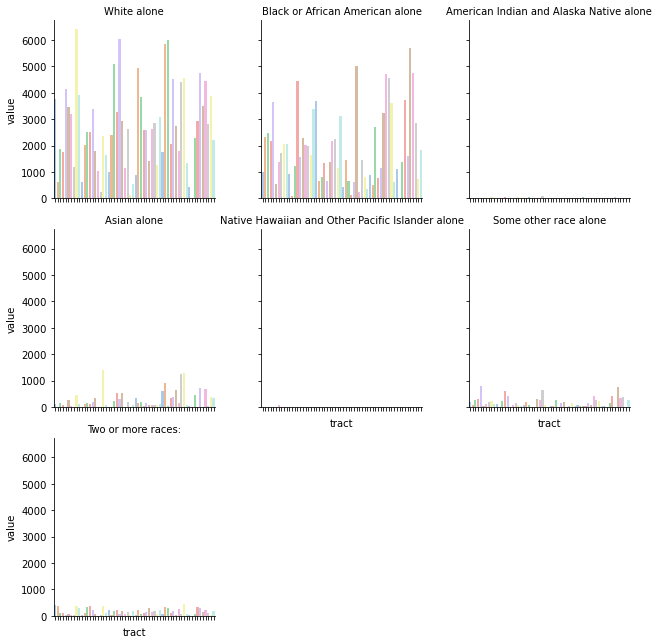

In [84]:
g = sns.catplot(x="tract",y="value", col="Subtype", col_wrap=3,
                data=getType(census_tracts,'Race'), ci=None, palette='pastel',
                kind="bar", height=3, aspect=1)
g.set_xticklabels([])
g.set_titles("{col_name}")

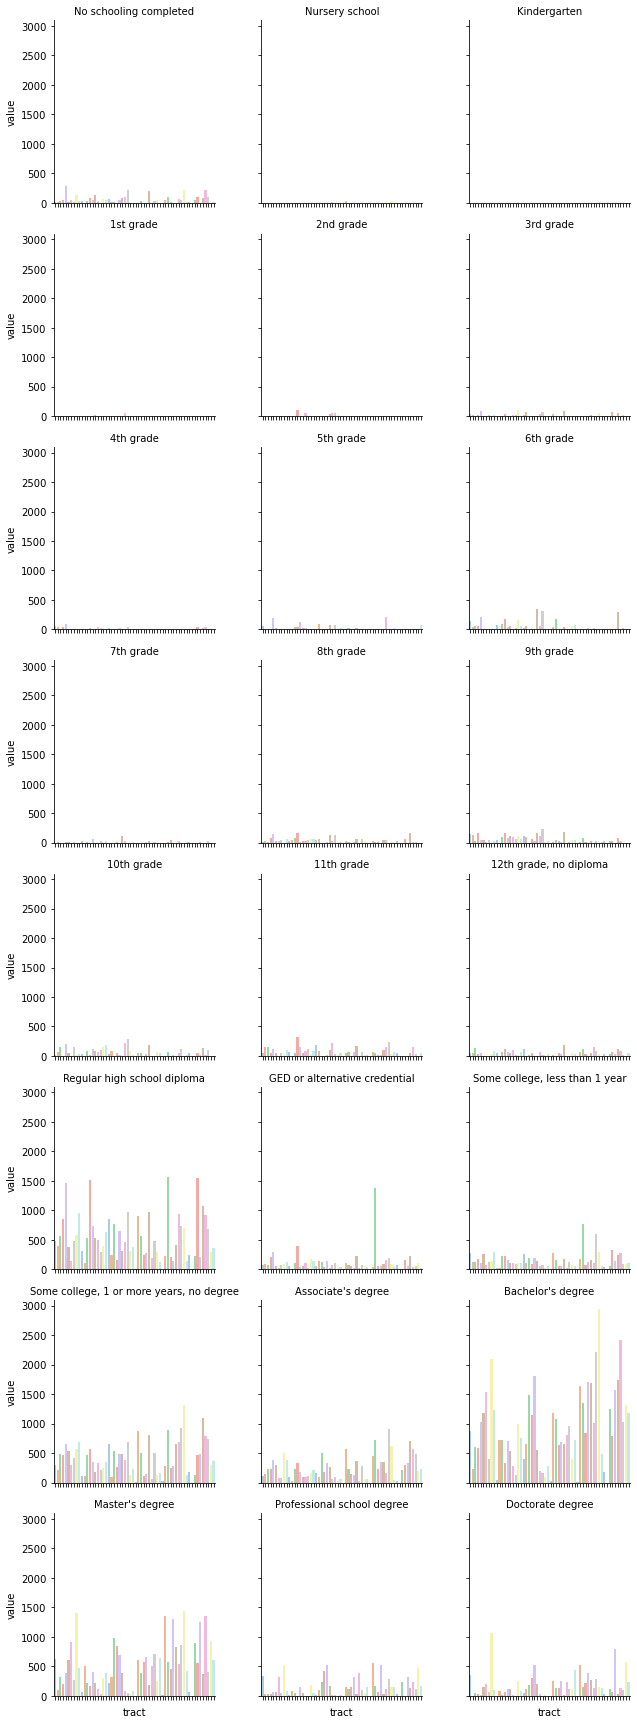

In [87]:
g = sns.catplot(x="tract",y="value", col="Subtype", col_wrap=3,
                data=getType(census_tracts,'Education'), ci=None, palette='pastel',
                kind="bar", height=3, aspect=1)
g.set_xticklabels([])
g.set_titles("{col_name}")

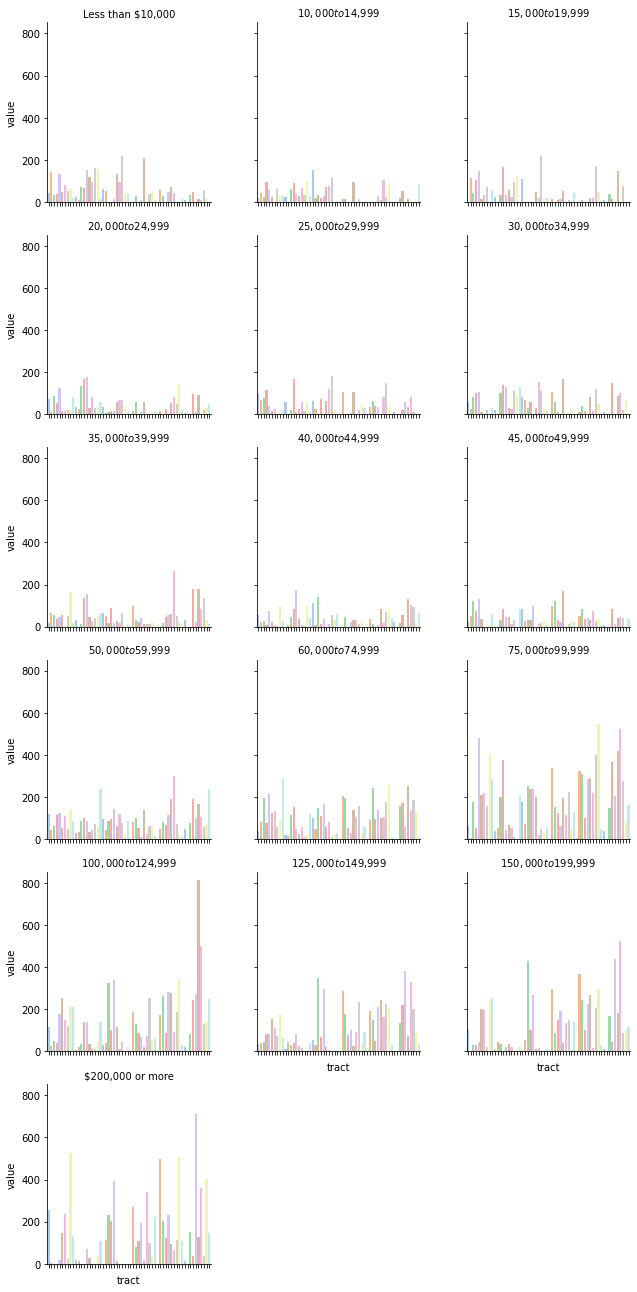

In [88]:
g = sns.catplot(x="tract",y="value", col="Subtype", col_wrap=3,
                data=getType(census_tracts,'Family Household Income'), ci=None, palette='pastel',
                kind="bar", height=3, aspect=1)
g.set_xticklabels([])
g.set_titles("{col_name}")

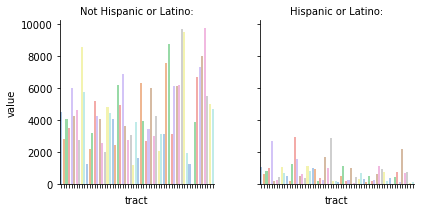

In [89]:
g = sns.catplot(x="tract",y="value", col="Subtype", col_wrap=2,
                data=getType(census_tracts,'Hispanic/Latino'), ci=None, palette='pastel',
                kind="bar", height=3, aspect=1)
g.set_xticklabels([])
g.set_titles("{col_name}")

### Continue EDA in Tableau

In [97]:
census_tracts.to_csv("37_063_census_tracts.csv")

## Tiger 2019 Census Tract Shapefiles For North Carolina

In [130]:
zipfile = "https://www2.census.gov/geo/tiger/TIGER2019/TRACT/tl_2019_37_tract.zip"
NCcensusTracts  = gp.read_file(zipfile)

# County code for Durham 
durhamCensusTractGeo = NCcensusTracts[NCcensusTracts['COUNTYFP'] =='063']

Ensure that the census tracts match from both the ACS Survey and 2019 Census Tract Shapefiles

In [144]:
assert (durhamCensusTractGeo['TRACTCE'].sort_values().values ==
        np.sort(census_tracts['tract'].unique())).all(), "Something went wrong. \
        Census Tracts Don't Match"

### Save the shapefiles for the census tracts of interest into a geojson file. This will be used when analyzing in Tableau.

In [146]:
durhamCensusTractGeo.to_file("37_063_census_tract_shapes.json", driver="GeoJSON")

## Next steps:
This is just a starting a point. Since I'm not too familiar with the ACS survey, I'd imagine there might be some variables--unsure about Table ID B15003 located at the start of this notebook--that will serve better for this project. For now, I'd say these are the next steps:
1. Identify and retrieve other variables of interest, in particular demographic-related variables
2. Condense number of variable where needed (ie. group certain Education attainment levels)
3. Perform EDA on the demographic data and iterate (step 1) as needed 

Somewhere in between the steps, more research is needed in understanding the ACS survey data methods as it'll be helpful to know when exploring the data.